In [3]:
import pandas as pd
import sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import pickle
from sklearn.metrics import (mean_squared_error, mean_absolute_error,r2_score)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## MAKE MODEL FOR FUEL CONSUMPTION PREDICTION

In [84]:
df = pd.read_excel('data/fuel-consumption.xlsx',na_values='?')

In [85]:
df.dropna(inplace=True)
df.drop(['car name'],axis=1,inplace=True)
df.drop(['type'],axis=1,inplace=True)

In [86]:
x = df.drop('kml',axis=1)
Y = df['kml']
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.2,random_state=101)

In [87]:
sc=StandardScaler()
x_train_std=sc.fit_transform(x_train)
x_test_std=sc.transform(x_test)

In [88]:
pickle.dump(sc, open(r'models/consumption-scaler.pkl', 'wb'))

In [89]:
consumptionModel = Sequential()

consumptionModel.add(Dense(units = 64,activation='relu',input_shape=[len(x_train.keys())]))
consumptionModel.add(Dense(units = 64,activation='relu'))
consumptionModel.add(Dense(units = 64,activation='relu'))
consumptionModel.add(Dense(units = 64,activation='relu'))
consumptionModel.add(Dense(units=1))

consumptionModel.compile(loss='mean_squared_error',
                optimizer='Adam',
                metrics=['mean_absolute_error', 'mean_squared_error'])

In [90]:
model_history=consumptionModel.fit(x_train_std, Y_train, batch_size = 100,epochs = 1000)

Epoch 1/1000
2/2 [==============================] - 0s 2ms/step - loss: 177.1069 - mean_absolute_error: 12.9843 - mean_squared_error: 177.1069
Epoch 2/1000
2/2 [==============================] - 0s 3ms/step - loss: 172.0385 - mean_absolute_error: 12.7798 - mean_squared_error: 172.0385
Epoch 3/1000
2/2 [==============================] - 0s 5ms/step - loss: 167.0420 - mean_absolute_error: 12.5703 - mean_squared_error: 167.0420
Epoch 4/1000
2/2 [==============================] - 0s 5ms/step - loss: 161.5971 - mean_absolute_error: 12.3451 - mean_squared_error: 161.5971
Epoch 5/1000
2/2 [==============================] - 0s 3ms/step - loss: 155.7119 - mean_absolute_error: 12.0888 - mean_squared_error: 155.7119
Epoch 6/1000
2/2 [==============================] - 0s 3ms/step - loss: 148.9859 - mean_absolute_error: 11.7943 - mean_squared_error: 148.9859
Epoch 7/1000
2/2 [==============================] - 0s 6ms/step - loss: 141.6900 - mean_absolute_error: 11.4741 - mean_squared_error: 141.6900

2/2 [==============================] - 0s 3ms/step - loss: 5.4391 - mean_absolute_error: 1.5976 - mean_squared_error: 5.4391
Epoch 118/1000
2/2 [==============================] - 0s 5ms/step - loss: 5.3498 - mean_absolute_error: 1.5782 - mean_squared_error: 5.3498
Epoch 119/1000
2/2 [==============================] - 0s 6ms/step - loss: 5.2939 - mean_absolute_error: 1.5663 - mean_squared_error: 5.2939
Epoch 120/1000
2/2 [==============================] - 0s 6ms/step - loss: 5.2550 - mean_absolute_error: 1.5601 - mean_squared_error: 5.2550
Epoch 121/1000
2/2 [==============================] - 0s 8ms/step - loss: 5.2197 - mean_absolute_error: 1.5532 - mean_squared_error: 5.2197
Epoch 122/1000
2/2 [==============================] - 0s 5ms/step - loss: 5.1912 - mean_absolute_error: 1.5528 - mean_squared_error: 5.1912
Epoch 123/1000
2/2 [==============================] - 0s 6ms/step - loss: 5.2364 - mean_absolute_error: 1.5694 - mean_squared_error: 5.2364
Epoch 124/1000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 4.1613 - mean_absolute_error: 1.3468 - mean_squared_error: 4.1613
Epoch 234/1000
2/2 [==============================] - 0s 3ms/step - loss: 4.1522 - mean_absolute_error: 1.3552 - mean_squared_error: 4.1522
Epoch 235/1000
2/2 [==============================] - 0s 3ms/step - loss: 4.1708 - mean_absolute_error: 1.3729 - mean_squared_error: 4.1708
Epoch 236/1000
2/2 [==============================] - 0s 3ms/step - loss: 4.1520 - mean_absolute_error: 1.3558 - mean_squared_error: 4.1520
Epoch 237/1000
2/2 [==============================] - 0s 3ms/step - loss: 4.2069 - mean_absolute_error: 1.3501 - mean_squared_error: 4.2069
Epoch 238/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.3185 - mean_absolute_error: 1.3586 - mean_squared_error: 4.3185
Epoch 239/1000
2/2 [==============================] - 0s 3ms/step - loss: 4.3270 - mean_absolute_error: 1.3614 - mean_squared_error: 4.3270
Epoch 240/1000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 3.9963 - mean_absolute_error: 1.3590 - mean_squared_error: 3.9963
Epoch 350/1000
2/2 [==============================] - 0s 3ms/step - loss: 4.0515 - mean_absolute_error: 1.3710 - mean_squared_error: 4.0515
Epoch 351/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9024 - mean_absolute_error: 1.3408 - mean_squared_error: 3.9024
Epoch 352/1000
2/2 [==============================] - 0s 4ms/step - loss: 3.8545 - mean_absolute_error: 1.3394 - mean_squared_error: 3.8545
Epoch 353/1000
2/2 [==============================] - 0s 4ms/step - loss: 3.8648 - mean_absolute_error: 1.3642 - mean_squared_error: 3.8648
Epoch 354/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.8587 - mean_absolute_error: 1.3525 - mean_squared_error: 3.8587
Epoch 355/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.8488 - mean_absolute_error: 1.3556 - mean_squared_error: 3.8488
Epoch 356/1000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 3.4818 - mean_absolute_error: 1.2134 - mean_squared_error: 3.4818
Epoch 466/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.3976 - mean_absolute_error: 1.1958 - mean_squared_error: 3.3976
Epoch 467/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.3900 - mean_absolute_error: 1.2012 - mean_squared_error: 3.3900
Epoch 468/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.4872 - mean_absolute_error: 1.2328 - mean_squared_error: 3.4872
Epoch 469/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.4729 - mean_absolute_error: 1.2541 - mean_squared_error: 3.4729
Epoch 470/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.3369 - mean_absolute_error: 1.2098 - mean_squared_error: 3.3369
Epoch 471/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.2998 - mean_absolute_error: 1.1886 - mean_squared_error: 3.2998
Epoch 472/1000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 2.7942 - mean_absolute_error: 1.1770 - mean_squared_error: 2.7942
Epoch 582/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.8638 - mean_absolute_error: 1.2149 - mean_squared_error: 2.8638
Epoch 583/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.8797 - mean_absolute_error: 1.2195 - mean_squared_error: 2.8797
Epoch 584/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.8197 - mean_absolute_error: 1.1897 - mean_squared_error: 2.8197
Epoch 585/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.8026 - mean_absolute_error: 1.1666 - mean_squared_error: 2.8026
Epoch 586/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.7364 - mean_absolute_error: 1.1344 - mean_squared_error: 2.7364
Epoch 587/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.8635 - mean_absolute_error: 1.1721 - mean_squared_error: 2.8635
Epoch 588/1000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 2.4203 - mean_absolute_error: 1.0708 - mean_squared_error: 2.4203
Epoch 698/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.4348 - mean_absolute_error: 1.0939 - mean_squared_error: 2.4348
Epoch 699/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.4287 - mean_absolute_error: 1.0965 - mean_squared_error: 2.4287
Epoch 700/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.3394 - mean_absolute_error: 1.0671 - mean_squared_error: 2.3394
Epoch 701/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.4702 - mean_absolute_error: 1.1008 - mean_squared_error: 2.4702
Epoch 702/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.5323 - mean_absolute_error: 1.0978 - mean_squared_error: 2.5323
Epoch 703/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.4882 - mean_absolute_error: 1.0782 - mean_squared_error: 2.4882
Epoch 704/1000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 1.9087 - mean_absolute_error: 0.9738 - mean_squared_error: 1.9087
Epoch 814/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.9233 - mean_absolute_error: 0.9800 - mean_squared_error: 1.9233
Epoch 815/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.9447 - mean_absolute_error: 0.9831 - mean_squared_error: 1.9447
Epoch 816/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.9659 - mean_absolute_error: 0.9879 - mean_squared_error: 1.9659
Epoch 817/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.0279 - mean_absolute_error: 1.0162 - mean_squared_error: 2.0279
Epoch 818/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.1773 - mean_absolute_error: 1.0695 - mean_squared_error: 2.1773
Epoch 819/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.3113 - mean_absolute_error: 1.0864 - mean_squared_error: 2.3113
Epoch 820/1000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 1.7527 - mean_absolute_error: 0.8901 - mean_squared_error: 1.7527
Epoch 930/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.7381 - mean_absolute_error: 0.8800 - mean_squared_error: 1.7381
Epoch 931/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.7485 - mean_absolute_error: 0.8991 - mean_squared_error: 1.7485
Epoch 932/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.7186 - mean_absolute_error: 0.9017 - mean_squared_error: 1.7186
Epoch 933/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.7134 - mean_absolute_error: 0.9112 - mean_squared_error: 1.7134
Epoch 934/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.7162 - mean_absolute_error: 0.9267 - mean_squared_error: 1.7162
Epoch 935/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.7924 - mean_absolute_error: 0.9613 - mean_squared_error: 1.7924
Epoch 936/1000
2/2 [===============

1/1 [==============================] - 0s 57ms/step


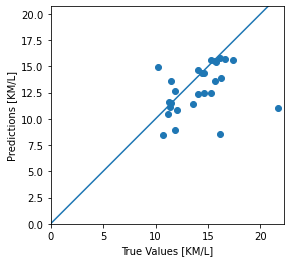

In [91]:
prediction = consumptionModel.predict(x_test_std)
plt.scatter(Y_test,prediction)
plt.xlabel('True Values [KM/L]')
plt.ylabel('Predictions [KM/L]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [92]:
consumptionModel.save(r'models/consumption-model.h5')

## MAKE MODEL FOR CAR TYPE

In [15]:
df = pd.read_excel('data/fuel-consumption.xlsx',na_values='?')
df.head()

,car name,cylinders,displacement,horsepower,weight,model year,type,kml
0,Hyundai Stargazer,4,1497,113.4,1191.0,22,1,12.04
1,Toyota Avanza Veloz 1.3 MT,4,1329,95.0,1045.0,22,1,14.60
2,mitsubishi Xpander,4,1499,104.0,1780.0,20,1,11.80
3,toyoya raize 1.0L Turbo,3,998,97.0,1255.0,21,2,11.50
4,toyota gr yaris,3,1618,257.0,1280.0,20,3,10.00


In [16]:
df.dtypes

car name         object
cylinders         int64
displacement      int64
horsepower      float64
weight          float64
model year        int64
type              int64
kml             float64
dtype: object

In [17]:
df.dropna(inplace=True)
df.drop(['car name'],axis=1,inplace=True)

In [18]:
x = df.drop('type',axis=1)
Y = df['type']
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.2,random_state=101)

In [19]:
sc=StandardScaler()
x_train_std=sc.fit_transform(x_train)
x_test_std=sc.transform(x_test)

In [20]:
pickle.dump(sc, open(r'models/type-scaler.pkl', 'wb'))

In [21]:
typeModel = Sequential()

typeModel.add(Dense(units = 64,activation='relu',input_shape=[len(x_train.keys())]))
typeModel.add(Dense(units = 64,activation='relu'))
typeModel.add(Dense(units = 64,activation='relu'))
typeModel.add(Dense(units = 64,activation='relu'))
typeModel.add(Dense(units=1))

typeModel.compile(loss='mean_squared_error',
                optimizer='Adam',
                metrics=['mean_absolute_error', 'mean_squared_error'])

In [22]:
model_history=typeModel.fit(x_train_std, Y_train, batch_size = 100,epochs = 1000)

Epoch 1/1000
2/2 [==============================] - 1s 2ms/step - loss: 15.5098 - mean_absolute_error: 3.7162 - mean_squared_error: 15.5098
Epoch 2/1000
2/2 [==============================] - 0s 3ms/step - loss: 14.5388 - mean_absolute_error: 3.5885 - mean_squared_error: 14.5388
Epoch 3/1000
2/2 [==============================] - 0s 4ms/step - loss: 13.7284 - mean_absolute_error: 3.4770 - mean_squared_error: 13.7284
Epoch 4/1000
2/2 [==============================] - 0s 5ms/step - loss: 12.9489 - mean_absolute_error: 3.3660 - mean_squared_error: 12.9489
Epoch 5/1000
2/2 [==============================] - 0s 5ms/step - loss: 12.1464 - mean_absolute_error: 3.2459 - mean_squared_error: 12.1464
Epoch 6/1000
2/2 [==============================] - 0s 4ms/step - loss: 11.2778 - mean_absolute_error: 3.1111 - mean_squared_error: 11.2778
Epoch 7/1000
2/2 [==============================] - 0s 4ms/step - loss: 10.3377 - mean_absolute_error: 2.9546 - mean_squared_error: 10.3377
Epoch 8/1000
2/2 [==

2/2 [==============================] - 0s 5ms/step - loss: 1.0727 - mean_absolute_error: 0.7152 - mean_squared_error: 1.0727
Epoch 60/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.0832 - mean_absolute_error: 0.7118 - mean_squared_error: 1.0832
Epoch 61/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.0951 - mean_absolute_error: 0.7098 - mean_squared_error: 1.0951
Epoch 62/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.0791 - mean_absolute_error: 0.7032 - mean_squared_error: 1.0791
Epoch 63/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.0706 - mean_absolute_error: 0.7050 - mean_squared_error: 1.0706
Epoch 64/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.0785 - mean_absolute_error: 0.7207 - mean_squared_error: 1.0785
Epoch 65/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.0780 - mean_absolute_error: 0.7252 - mean_squared_error: 1.0780
Epoch 66/1000
2/2 [======================

2/2 [==============================] - 0s 3ms/step - loss: 0.9447 - mean_absolute_error: 0.6471 - mean_squared_error: 0.9447
Epoch 118/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.9531 - mean_absolute_error: 0.6493 - mean_squared_error: 0.9531
Epoch 119/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.9500 - mean_absolute_error: 0.6496 - mean_squared_error: 0.9500
Epoch 120/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.9445 - mean_absolute_error: 0.6538 - mean_squared_error: 0.9445
Epoch 121/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.9441 - mean_absolute_error: 0.6580 - mean_squared_error: 0.9441
Epoch 122/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.9500 - mean_absolute_error: 0.6652 - mean_squared_error: 0.9500
Epoch 123/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.9637 - mean_absolute_error: 0.6746 - mean_squared_error: 0.9637
Epoch 124/1000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.8436 - mean_absolute_error: 0.6055 - mean_squared_error: 0.8436
Epoch 176/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.8462 - mean_absolute_error: 0.6072 - mean_squared_error: 0.8462
Epoch 177/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.8495 - mean_absolute_error: 0.6123 - mean_squared_error: 0.8495
Epoch 178/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.8513 - mean_absolute_error: 0.6256 - mean_squared_error: 0.8513
Epoch 179/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.8438 - mean_absolute_error: 0.6268 - mean_squared_error: 0.8438
Epoch 180/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.8351 - mean_absolute_error: 0.6135 - mean_squared_error: 0.8351
Epoch 181/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.8283 - mean_absolute_error: 0.6043 - mean_squared_error: 0.8283
Epoch 182/1000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.8078 - mean_absolute_error: 0.6163 - mean_squared_error: 0.8078
Epoch 234/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.8439 - mean_absolute_error: 0.6327 - mean_squared_error: 0.8439
Epoch 235/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.8921 - mean_absolute_error: 0.6596 - mean_squared_error: 0.8921
Epoch 236/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.8746 - mean_absolute_error: 0.6440 - mean_squared_error: 0.8746
Epoch 237/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.8242 - mean_absolute_error: 0.6027 - mean_squared_error: 0.8242
Epoch 238/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.7853 - mean_absolute_error: 0.5763 - mean_squared_error: 0.7853
Epoch 239/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.7897 - mean_absolute_error: 0.5995 - mean_squared_error: 0.7897
Epoch 240/1000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.7227 - mean_absolute_error: 0.5967 - mean_squared_error: 0.7227
Epoch 292/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.7094 - mean_absolute_error: 0.5663 - mean_squared_error: 0.7094
Epoch 293/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.7196 - mean_absolute_error: 0.5543 - mean_squared_error: 0.7196
Epoch 294/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.7370 - mean_absolute_error: 0.5620 - mean_squared_error: 0.7370
Epoch 295/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.7371 - mean_absolute_error: 0.5679 - mean_squared_error: 0.7371
Epoch 296/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.7172 - mean_absolute_error: 0.5619 - mean_squared_error: 0.7172
Epoch 297/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.7099 - mean_absolute_error: 0.5634 - mean_squared_error: 0.7099
Epoch 298/1000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.6280 - mean_absolute_error: 0.5137 - mean_squared_error: 0.6280
Epoch 350/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.6306 - mean_absolute_error: 0.5104 - mean_squared_error: 0.6306
Epoch 351/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6381 - mean_absolute_error: 0.5088 - mean_squared_error: 0.6381
Epoch 352/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6386 - mean_absolute_error: 0.5052 - mean_squared_error: 0.6386
Epoch 353/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6215 - mean_absolute_error: 0.4959 - mean_squared_error: 0.6215
Epoch 354/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6162 - mean_absolute_error: 0.5017 - mean_squared_error: 0.6162
Epoch 355/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.6305 - mean_absolute_error: 0.5204 - mean_squared_error: 0.6305
Epoch 356/1000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.5643 - mean_absolute_error: 0.4883 - mean_squared_error: 0.5643
Epoch 408/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6020 - mean_absolute_error: 0.5098 - mean_squared_error: 0.6020
Epoch 409/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6023 - mean_absolute_error: 0.5063 - mean_squared_error: 0.6023
Epoch 410/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.5868 - mean_absolute_error: 0.4944 - mean_squared_error: 0.5868
Epoch 411/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6044 - mean_absolute_error: 0.5058 - mean_squared_error: 0.6044
Epoch 412/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6297 - mean_absolute_error: 0.5243 - mean_squared_error: 0.6297
Epoch 413/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.5850 - mean_absolute_error: 0.4872 - mean_squared_error: 0.5850
Epoch 414/1000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.5671 - mean_absolute_error: 0.4940 - mean_squared_error: 0.5671
Epoch 466/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.5928 - mean_absolute_error: 0.5151 - mean_squared_error: 0.5928
Epoch 467/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.6278 - mean_absolute_error: 0.5421 - mean_squared_error: 0.6278
Epoch 468/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6478 - mean_absolute_error: 0.5549 - mean_squared_error: 0.6478
Epoch 469/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.6525 - mean_absolute_error: 0.5463 - mean_squared_error: 0.6525
Epoch 470/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.6401 - mean_absolute_error: 0.5349 - mean_squared_error: 0.6401
Epoch 471/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.5953 - mean_absolute_error: 0.5080 - mean_squared_error: 0.5953
Epoch 472/1000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.5582 - mean_absolute_error: 0.4835 - mean_squared_error: 0.5582
Epoch 524/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.5842 - mean_absolute_error: 0.5007 - mean_squared_error: 0.5842
Epoch 525/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.5316 - mean_absolute_error: 0.4566 - mean_squared_error: 0.5316
Epoch 526/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.4621 - mean_absolute_error: 0.4251 - mean_squared_error: 0.4621
Epoch 527/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.4743 - mean_absolute_error: 0.4686 - mean_squared_error: 0.4743
Epoch 528/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.4854 - mean_absolute_error: 0.4730 - mean_squared_error: 0.4854
Epoch 529/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.4790 - mean_absolute_error: 0.4604 - mean_squared_error: 0.4790
Epoch 530/1000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.4289 - mean_absolute_error: 0.4306 - mean_squared_error: 0.4289
Epoch 582/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.4158 - mean_absolute_error: 0.4202 - mean_squared_error: 0.4158
Epoch 583/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.4069 - mean_absolute_error: 0.4088 - mean_squared_error: 0.4069
Epoch 584/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.4207 - mean_absolute_error: 0.4236 - mean_squared_error: 0.4207
Epoch 585/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.4504 - mean_absolute_error: 0.4426 - mean_squared_error: 0.4504
Epoch 586/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.4501 - mean_absolute_error: 0.4364 - mean_squared_error: 0.4501
Epoch 587/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.4243 - mean_absolute_error: 0.4209 - mean_squared_error: 0.4243
Epoch 588/1000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.3434 - mean_absolute_error: 0.3770 - mean_squared_error: 0.3434
Epoch 640/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.3345 - mean_absolute_error: 0.3705 - mean_squared_error: 0.3345
Epoch 641/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.3447 - mean_absolute_error: 0.3862 - mean_squared_error: 0.3447
Epoch 642/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.3514 - mean_absolute_error: 0.3897 - mean_squared_error: 0.3514
Epoch 643/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.3396 - mean_absolute_error: 0.3779 - mean_squared_error: 0.3396
Epoch 644/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.3418 - mean_absolute_error: 0.3709 - mean_squared_error: 0.3418
Epoch 645/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.3498 - mean_absolute_error: 0.3729 - mean_squared_error: 0.3498
Epoch 646/1000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.3259 - mean_absolute_error: 0.3767 - mean_squared_error: 0.3259
Epoch 698/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.3560 - mean_absolute_error: 0.3842 - mean_squared_error: 0.3560
Epoch 699/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.3940 - mean_absolute_error: 0.4143 - mean_squared_error: 0.3940
Epoch 700/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.4049 - mean_absolute_error: 0.4277 - mean_squared_error: 0.4049
Epoch 701/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.3763 - mean_absolute_error: 0.4075 - mean_squared_error: 0.3763
Epoch 702/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.3178 - mean_absolute_error: 0.3682 - mean_squared_error: 0.3178
Epoch 703/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.3083 - mean_absolute_error: 0.3700 - mean_squared_error: 0.3083
Epoch 704/1000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.2697 - mean_absolute_error: 0.3303 - mean_squared_error: 0.2697
Epoch 756/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.2853 - mean_absolute_error: 0.3464 - mean_squared_error: 0.2853
Epoch 757/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.2734 - mean_absolute_error: 0.3327 - mean_squared_error: 0.2734
Epoch 758/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.2971 - mean_absolute_error: 0.3478 - mean_squared_error: 0.2971
Epoch 759/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.4067 - mean_absolute_error: 0.4357 - mean_squared_error: 0.4067
Epoch 760/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.4200 - mean_absolute_error: 0.4332 - mean_squared_error: 0.4200
Epoch 761/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.3482 - mean_absolute_error: 0.3556 - mean_squared_error: 0.3482
Epoch 762/1000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.2859 - mean_absolute_error: 0.3347 - mean_squared_error: 0.2859
Epoch 814/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.3131 - mean_absolute_error: 0.3768 - mean_squared_error: 0.3131
Epoch 815/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.3219 - mean_absolute_error: 0.3827 - mean_squared_error: 0.3219
Epoch 816/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.2897 - mean_absolute_error: 0.3380 - mean_squared_error: 0.2897
Epoch 817/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.2566 - mean_absolute_error: 0.3133 - mean_squared_error: 0.2566
Epoch 818/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.2660 - mean_absolute_error: 0.3301 - mean_squared_error: 0.2660
Epoch 819/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.3037 - mean_absolute_error: 0.3841 - mean_squared_error: 0.3037
Epoch 820/1000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.2640 - mean_absolute_error: 0.3198 - mean_squared_error: 0.2640
Epoch 872/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.2774 - mean_absolute_error: 0.3397 - mean_squared_error: 0.2774
Epoch 873/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.2693 - mean_absolute_error: 0.3273 - mean_squared_error: 0.2693
Epoch 874/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.2586 - mean_absolute_error: 0.3233 - mean_squared_error: 0.2586
Epoch 875/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.2523 - mean_absolute_error: 0.3204 - mean_squared_error: 0.2523
Epoch 876/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.2493 - mean_absolute_error: 0.3231 - mean_squared_error: 0.2493
Epoch 877/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.2314 - mean_absolute_error: 0.3142 - mean_squared_error: 0.2314
Epoch 878/1000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.2123 - mean_absolute_error: 0.3023 - mean_squared_error: 0.2123
Epoch 930/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.1957 - mean_absolute_error: 0.2819 - mean_squared_error: 0.1957
Epoch 931/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.2218 - mean_absolute_error: 0.3166 - mean_squared_error: 0.2218
Epoch 932/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.2523 - mean_absolute_error: 0.3482 - mean_squared_error: 0.2523
Epoch 933/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.2337 - mean_absolute_error: 0.3250 - mean_squared_error: 0.2337
Epoch 934/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.1977 - mean_absolute_error: 0.2753 - mean_squared_error: 0.1977
Epoch 935/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.2048 - mean_absolute_error: 0.3004 - mean_squared_error: 0.2048
Epoch 936/1000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.2237 - mean_absolute_error: 0.3605 - mean_squared_error: 0.2237
Epoch 988/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.3059 - mean_absolute_error: 0.4275 - mean_squared_error: 0.3059
Epoch 989/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.2395 - mean_absolute_error: 0.3208 - mean_squared_error: 0.2395
Epoch 990/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.1741 - mean_absolute_error: 0.2717 - mean_squared_error: 0.1741
Epoch 991/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.2304 - mean_absolute_error: 0.3642 - mean_squared_error: 0.2304
Epoch 992/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.2095 - mean_absolute_error: 0.3398 - mean_squared_error: 0.2095
Epoch 993/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.1542 - mean_absolute_error: 0.2550 - mean_squared_error: 0.1542
Epoch 994/1000
2/2 [===============

1/1 [==============================] - 0s 84ms/step


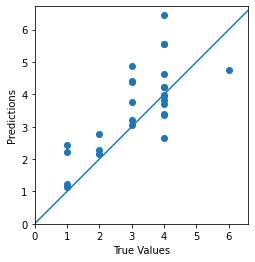

In [23]:
prediction = typeModel.predict(x_test_std)
plt.scatter(Y_test,prediction)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [24]:
typeModel.save(r'models/type-model.h5')